# Fruit Classification Using Convolutional Neural Networks (CNN)

This project demonstrates how to build and train a Convolutional Neural Network (CNN) using TensorFlow/Keras to classify different types of fruits from images. The model is trained on the [Fruits-360 dataset](https://www.kaggle.com/moltean/fruits), which contains thousands of labeled images of fruits.

---

## 📌 Project Overview

- **Objective**: Automatically classify images of fruits (e.g., apple, banana, strawberry) using a deep learning model.
- **Approach**: Train a custom CNN on a preprocessed and resized version of the Fruits-360 dataset.
- **Output**: A trained model (`.h5`) that can predict the class of a fruit image and visualize the result.

---

## 🔍 Key Features

- Preprocessing with `ImageDataGenerator` for normalization and data loading
- CNN architecture with convolution, pooling, dropout, and dense layers
- Training with accuracy/validation tracking
- Visualization of training results and confusion matrix
- Evaluation with classification report
- Predict function to classify new fruit images

## Step 1: Import Libraries

- `os`: Used for handling directory and file path operations.
- `numpy`: Fundamental package for numerical computation and array manipulation.
- `matplotlib.pyplot`: Used for plotting graphs and displaying images in Jupyter Notebooks.
- `tensorflow`: The deep learning framework used to build and train the CNN.
- `tensorflow.keras.preprocessing.image.ImageDataGenerator`: Automatically loads, resizes, normalizes, and augments images from folders.
- `tensorflow.keras.models.Sequential`: A linear stack of layers for building the CNN architecture.
- `tensorflow.keras.layers`: Includes layers used in the CNN:
  - `Conv2D`: Applies 2D convolution to extract features from images.
  - `MaxPooling2D`: Downsamples feature maps to reduce spatial dimensions.
  - `Flatten`: Flattens the feature maps into a 1D vector for the dense layers.
  - `Dense`: Fully connected layers for classification.
  - `Dropout`: Helps prevent overfitting by randomly disabling some neurons during training.
- `sklearn.metrics`:
  - `classification_report`: Generates precision, recall, and F1-score metrics.
  - `confusion_matrix`: Builds a matrix comparing predictions with actual classes.
- `seaborn`: Statistical data visualization library used to plot the confusion matrix heatmap.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

## Step 2: Set Image Size and Data Paths
- `img_size`: Specifies the target width and height (in pixels) to which all images will be resized. This ensures consistent input size for the CNN.
- `batch_size`: Number of images processed in one batch during training or evaluation.
- `train_dir`: Path to the training dataset directory. Each fruit class should be in its own subfolder.
- `test_dir`: Path to the testing dataset directory. Structured similarly to the training set.

In [2]:
img_size = 100
batch_size = 32

train_dir = "fruit_dataset/fruits-360-100x100/Train"
test_dir = "fruit_dataset/fruits-360-100x100/Test"

## Step 3: Load and Preprocess the Dataset
We use `ImageDataGenerator` from Keras to load and normalize the images from the training and testing directories.

- `rescale=1./255`: Scales pixel values from [0, 255] to [0, 1] for normalization.
- `flow_from_directory(...)`: Automatically reads images from subfolders, assigns labels based on folder names, resizes them, and prepares batches.
- `class_mode="categorical"`: Used for multi-class classification; the labels are one-hot encoded.

- `shuffle=True (train)`: Ensures better generalization by randomizing image order.

- `shuffle=False (test)`: Keeps the order for consistent evaluation.
- `class_indices`: A dictionary mapping class names to numeric labels.

- `class_names`: A list of class names extracted from the training directory.

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

class_names = list(train_generator.class_indices.keys())

Found 6096 images belonging to 5 classes.
Found 1528 images belonging to 5 classes.


## Step 4: Build the CNN Model
We use the **Sequential API** to define a Convolutional Neural Network for multi-class fruit classification.

- `Conv2D`: Applies 2D convolution filters to extract spatial features.

- `MaxPooling2D`: Downsamples feature maps, reducing spatial dimensions and computation.

- `Flatten`: Converts the 2D feature maps into a 1D vector.

- `Dense`: Fully connected layer for learning complex patterns.

- `Dropout`: Randomly disables 50% of neurons during training to prevent overfitting.

- `softmax`: Outputs a probability distribution over all fruit classes.

In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(len(class_names), activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

d:\Image-processing\deeplearning-for-image-processing\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,371,589 (12.86 MB)

 Trainable params: 3,371,589 (12.86 MB)

 Non-trainable params: 0 (0.00 B)

## Step 5: Train the CNN Model
We now train the model using the training data and validate it on the test data after each epoch.

How It Works
- `train_generator`: Supplies batches of training images and labels.

- `epochs=10`: The model will go through the entire training dataset 10 times.

- `validation_data=test_generator`: After each epoch, the model is evaluated on the test dataset to monitor overfitting and generalization.

Output
The returned `history` object contains training and validation loss/accuracy for each epoch.

We’ll use this later to visualize the learning curves and evaluate performance.

In [7]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 43s 226ms/step - accuracy: 0.9438 - loss: 0.1599 - val_accuracy: 0.9188 - val_loss: 0.2505
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 42s 222ms/step - accuracy: 0.9618 - loss: 0.1262 - val_accuracy: 0.9444 - val_loss: 0.1877
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 42s 221ms/step - accuracy: 0.9689 - loss: 0.0974 - val_accuracy: 0.9450 - val_loss: 0.2024
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 42s 218ms/step - accuracy: 0.9715 - loss: 0.0787 - val_accuracy: 0.9444 - val_loss: 0.2008
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 42s 220ms/step - accuracy: 0.9754 - loss: 0.0713 - val_accuracy: 0.9385 - val_loss: 0.2010
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 46s 241ms/step - accuracy: 0.9889 - loss: 0.0369 - val_accuracy: 0.9496 - val_loss: 0.2152
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 65s 341ms/step - accuracy: 0.9754 - loss: 0.0775 - val_accuracy: 0.9476 - val_loss: 0.2360
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 56s 295ms/step - accuracy: 0.9840 - loss: 0

## Step 6: Save the Trained Model

After training, we save the model to a file for later use (inference or further training).
- `"fruit_classifier_model.h5"`: The file name and format used for saving the entire Keras model.

The saved `.h5` file includes:

Model architecture

Trained weights

Optimizer configuration

Training state (if resumed training is needed)

This allows easy reloading later without retraining the model from scratch.

In [9]:
model.save("fruit_classifier_model.h5")

print("✅ Model saved as fruit_classifier_model.h5")

✅ Model saved as fruit_classifier_model.h5


## Step 7: Visualize Training and Validation Accuracy
We use Matplotlib to plot how the model's accuracy changed during training and validation over each epoch.
- `history.history["accuracy"]`: Accuracy values on the training set after each epoch.

- `history.history["val_accuracy"]`: Accuracy values on the test set (validation) after each epoch.

- Helps us understand whether the model is overfitting, underfitting, or learning well.

This plot provides a visual summary of how well the model performed during training and how well it generalized to unseen data.

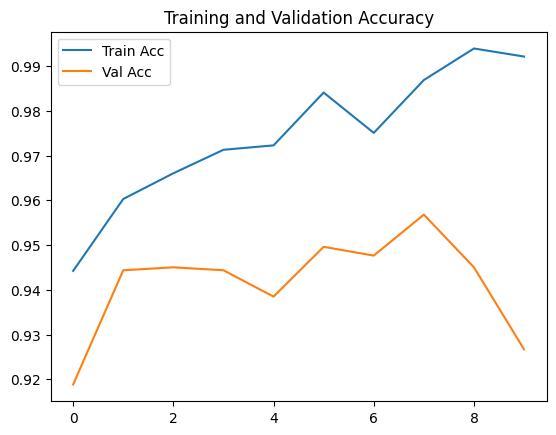

In [10]:
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

## Step 8: Evaluate the Model

We generate a classification report and confusion matrix to assess how well the model performs on the test set.
- `test_generator.reset()`: Resets the generator's internal pointer so predictions align with labels.

- `model.predict(...)`: Predicts probabilities for each class.

- `np.argmax(...)`: Converts softmax outputs to predicted class indices.

- `classification_report(...)`: Prints precision, recall, F1-score, and support for each class.

- `confusion_matrix(...)`: Compares true labels with predicted labels.

- `sns.heatmap(...)`: Visualizes the confusion matrix.

    - Diagonal cells represent correct predictions.

    - Off-diagonal cells indicate misclassifications.

- Useful for understanding which fruit classes are getting confused by the model.

48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 155ms/step
Classification Report:
              precision    recall  f1-score   support

       apple       0.92      0.88      0.90       305
      banana       0.97      0.91      0.94       325
      grapes       0.95      0.88      0.91       314
      orange       0.91      0.98      0.94       290
  strawberry       0.89      1.00      0.94       294

    accuracy                           0.93      1528
   macro avg       0.93      0.93      0.93      1528
weighted avg       0.93      0.93      0.93      1528



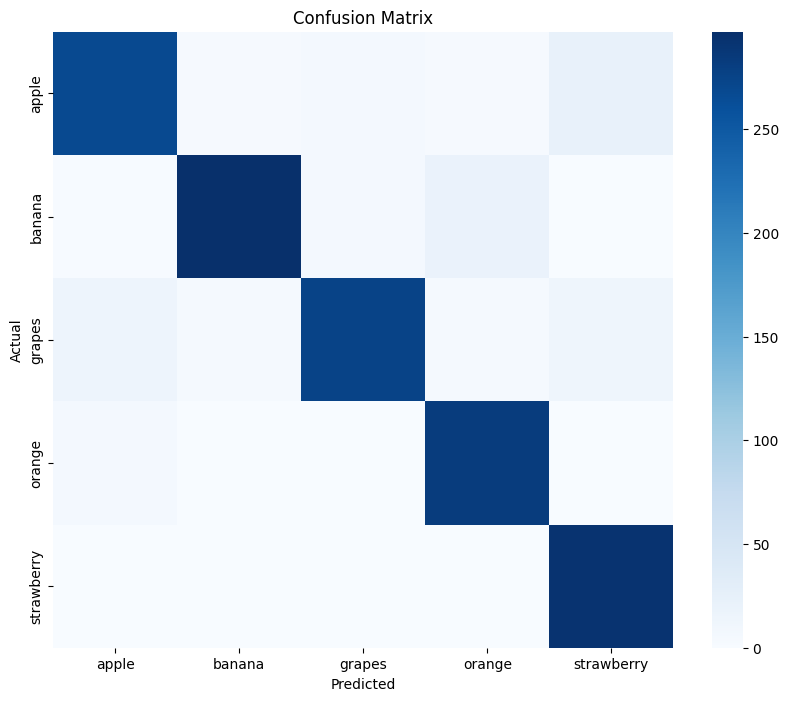

In [11]:
test_generator.reset()
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

print("Classification Report:")
print(classification_report(test_generator.classes, y_pred, target_names=class_names))

cm = confusion_matrix(test_generator.classes, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, xticklabels=class_names, yticklabels=class_names, cmap='Blues', annot=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Step 9: Predict a New Fruit Image
We define a custom function to load a new image, preprocess it, make a prediction using the trained model, and display the result.
- `image.load_img(...)`: Loads the input image and resizes it to match the model’s expected input.

- `image.img_to_array(...)`: Converts the image to a NumPy array.

- `/ 255.0`: Normalizes pixel values to the [0, 1] range.

- `np.expand_dims(...)`: Adds a batch dimension (1, height, width, channels).

- `model.predict(...)`: Generates prediction probabilities from the trained model.

- `np.argmax(...)`: Gets the index of the class with the highest probability.

- `plt.imshow(...)`: Displays the input image with the predicted label.

In [12]:
from tensorflow.keras.preprocessing import image
def predict_fruit(img_path):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis("off")
    plt.show()


## Result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


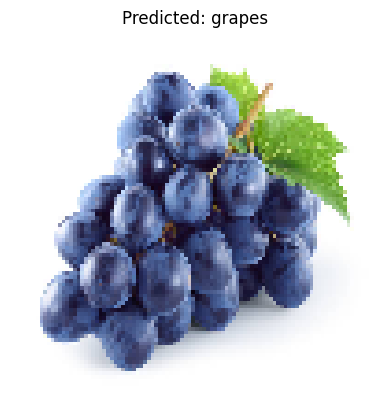

In [16]:
predict_fruit("images/grape.jpg")
